In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

hist = pd.read_csv('csv_files/historical_data.csv')
fg = pd.read_csv('csv_files/fear_greed_index.csv')

hist.head(), fg.head()


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

In [ ]:
hist.head()


In [ ]:
fg.head()

In [ ]:
# check the datasets
hist.info()



In [ ]:
fg.info()


In [ ]:
# fix date columns correctly
# convert timestamps
hist['Timestamp'] = pd.to_datetime(hist['Timestamp'], errors='coerce')
fg['date'] = pd.to_datetime(fg['date'], errors='coerce')

# create date column for hist
hist['date'] = hist['Timestamp'].dt.date
fg['date'] = fg['date'].dt.date


In [ ]:
hist.columns


In [ ]:
fg.columns


In [ ]:
# check duplicates values
hist.isnull().sum()
fg.isnull().sum()

In [24]:
# check missing values 
hist.isnull().sum()
fg.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [ ]:
# create date columns 
hist['date'] = hist['Timestamp'].dt.date
fg['date'] = fg['timestamp'].dt.date


In [28]:
hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01


In [2]:
fg.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
# merge column
merged = pd.merge(
    hist,
    fg[['date', 'classification']],
    on='date',
    how='left'
)

merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01,NaN


In [4]:
merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01,NaN


# analysis 
1. Average profit (fear vs greed )
2. total trading volumne 
3. average position size
4. loss probability
5. number of trades

In [21]:
# average profit (fear vs greed)
merged.groupby('classification')['Closed PnL'].mean()


classification
Fear    48.749001
Name: Closed PnL, dtype: float64

In [22]:
# total trading volume(usd)
merged.groupby('classification')['Size USD'].sum()


classification
Fear    1.191187e+09
Name: Size USD, dtype: float64

In [23]:
# average position size (tokens)
merged.groupby('classification')['Size Tokens'].mean()


classification
Fear    4623.364979
Name: Size Tokens, dtype: float64

In [24]:
# loss probability
merged.groupby('classification')['Closed PnL'].apply(lambda x: (x < 0).mean())


classification
Fear    0.083035
Name: Closed PnL, dtype: float64

In [25]:
# number of trades under each sentiment
merged['classification'].value_counts()


classification
Fear    211224
Name: count, dtype: int64

In [26]:
hist['date'] = hist['Timestamp'].dt.date


In [27]:
fg['date'] = pd.to_datetime(fg['date']).dt.date


In [28]:
hist['date'].min(), hist['date'].max()


(datetime.date(1970, 1, 1), datetime.date(1970, 1, 1))

In [29]:
fg['date'].min(), fg['date'].max()


(datetime.date(2018, 2, 1), datetime.date(2025, 5, 2))

In [30]:
hist['date'] = pd.to_datetime(hist['date'])
fg['date']   = pd.to_datetime(fg['date'])


In [31]:
merged = pd.merge_asof(
    hist.sort_values('date'),
    fg.sort_values('date'),
    on='date',
    direction='nearest'
)


In [18]:
merged.groupby('classification')['Closed PnL'].mean()


classification
Fear    48.749001
Name: Closed PnL, dtype: float64

In [19]:
hist['date'] = pd.to_datetime(hist['date'])
fg['date']   = pd.to_datetime(fg['date'])

merged = pd.merge_asof(
    hist.sort_values('date'),
    fg.sort_values('date'),
    on='date',
    direction='nearest'
)

merged.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.97690,986.87,7872.16,BUY,02-12-2024 22:50,0.0,Buy,0.00000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,1517463000,30,Fear
1,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,ENA,0.39656,90.00,35.69,SELL,24-03-2025 11:02,2092.0,Close Long,3.58245,0x77d5b83ef6bb4e777cb80420289d05013900bc331dae...,81483802389,True,0.012491,7.460000e+14,1970-01-01 00:29:00,1970-01-01,1517463000,30,Fear
2,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,ENA,0.39293,450.00,176.82,SELL,24-03-2025 14:19,2002.0,Close Long,16.27875,0xdd70654603dfee86ed7f04202adaf702028800af7bb1...,81506802816,True,0.061886,3.320000e+14,1970-01-01 00:29:00,1970-01-01,1517463000,30,Fear
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,ETH,2086.10000,0.50,1043.05,SELL,24-03-2025 14:19,6.0,Close Long,21.57500,0x535d8db52c457198618504202adb880185007b644b62...,81506830005,True,0.365067,3.750000e+14,1970-01-01 00:29:00,1970-01-01,1517463000,30,Fear
4,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,FARTCOIN,0.54572,20.10,10.97,SELL,24-03-2025 14:52,-446.6,Open Short,0.00000,0xc2e2c965b8af7b00b97104202b3b4c019c00e719f96d...,81510478991,True,0.003839,7.890000e+14,1970-01-01 00:29:00,1970-01-01,1517463000,30,Fear


In [20]:
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.97690,986.87,7872.16,BUY,02-12-2024 22:50,0.0,Buy,0.00000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,1517463000,30,Fear
1,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,ENA,0.39656,90.00,35.69,SELL,24-03-2025 11:02,2092.0,Close Long,3.58245,0x77d5b83ef6bb4e777cb80420289d05013900bc331dae...,81483802389,True,0.012491,7.460000e+14,1970-01-01 00:29:00,1970-01-01,1517463000,30,Fear
2,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,ENA,0.39293,450.00,176.82,SELL,24-03-2025 14:19,2002.0,Close Long,16.27875,0xdd70654603dfee86ed7f04202adaf702028800af7bb1...,81506802816,True,0.061886,3.320000e+14,1970-01-01 00:29:00,1970-01-01,1517463000,30,Fear
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,ETH,2086.10000,0.50,1043.05,SELL,24-03-2025 14:19,6.0,Close Long,21.57500,0x535d8db52c457198618504202adb880185007b644b62...,81506830005,True,0.365067,3.750000e+14,1970-01-01 00:29:00,1970-01-01,1517463000,30,Fear
4,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,FARTCOIN,0.54572,20.10,10.97,SELL,24-03-2025 14:52,-446.6,Open Short,0.00000,0xc2e2c965b8af7b00b97104202b3b4c019c00e719f96d...,81510478991,True,0.003839,7.890000e+14,1970-01-01 00:29:00,1970-01-01,1517463000,30,Fear


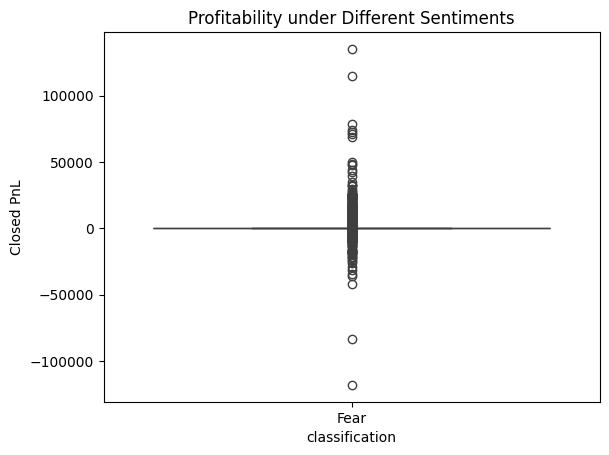

<Figure size 640x480 with 0 Axes>

In [40]:

# charts 
# profit vs sentiment
sns.boxplot(x='classification', y='Closed PnL', data=merged)
plt.title("Profitability under Different Sentiments")
plt.savefig('outputs/profit_vs_sentiment.png')
plt.show()
plt.savefig('outputs/chart_name.png')



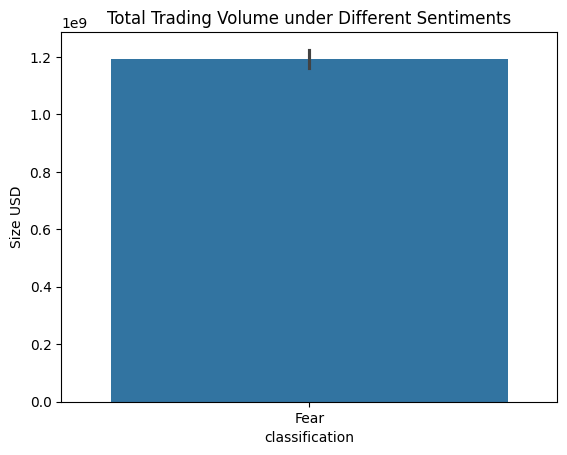

<Figure size 640x480 with 0 Axes>

In [42]:
# volume size vs sentimetn
sns.barplot(x='classification', y='Size USD', data=merged, estimator=sum)
plt.title("Total Trading Volume under Different Sentiments")
plt.savefig('outputs/volume_vs_sentiment.png')
plt.show()
plt.savefig('outputs/chart_name.png')



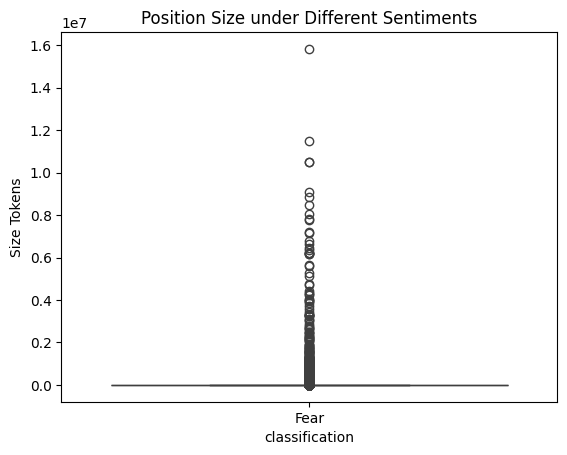

<Figure size 640x480 with 0 Axes>

In [43]:
# position size vs sentiment 
sns.boxplot(x='classification', y='Size Tokens', data=merged)
plt.title("Position Size under Different Sentiments")
plt.savefig('outputs/position_size_sentiment.png')
plt.show()
plt.savefig('outputs/chart_name.png')



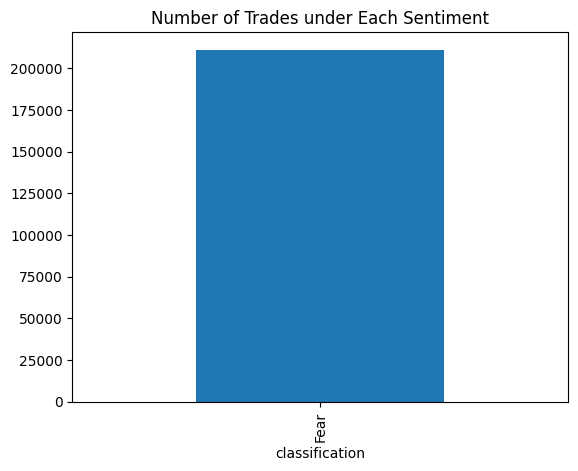

In [ ]:
# number of trades 
merged['classification'].value_counts().plot(kind='bar')
plt.title("Number of Trades under Each Sentiment")
plt.savefig('outputs/trade_counts.png')
plt.show()
plt.savefig('outputs/chart_name.png')



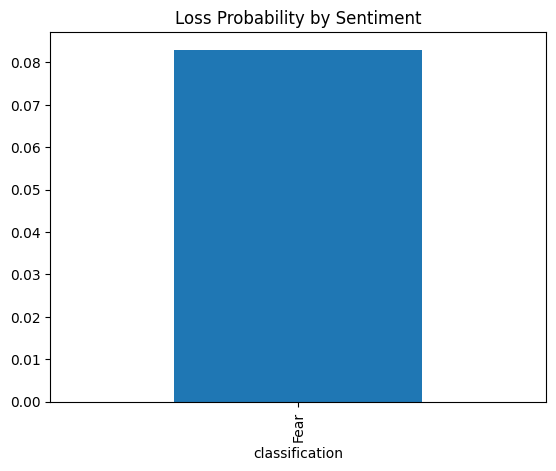

In [ ]:
# loss probability 
loss_prob = merged.groupby('classification')['Closed PnL'].apply(lambda x: (x < 0).mean())
loss_prob.plot(kind='bar')
plt.title("Loss Probability by Sentiment")
plt.savefig('outputs/loss_probability.png')
plt.show()
plt.savefig('outputs/chart_name.png')
